In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('data.csv')
scaler = MinMaxScaler()

# Prepare the data
X = data[['peak', 'ds']].values
scaler.fit(X)
X_scaled = scaler.transform(X)

y_mass = data['mass'].values / 1e30
y_energy= data['energy'].values / 1e44 


In [13]:
def train(layer, y_energy):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_energy, test_size=0.2, random_state=42)
    model = MLPRegressor(hidden_layer_sizes=(layer), random_state=1, max_iter=500)
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    return y_pred,y_test

In [14]:
best_accu_mass = 1000
best_accu_energy = 1000

best_layer_mass = None
best_layer_energy = None

for i in range(15,80,5):
    for j in range(15,80,5):
        layer=(i,j)
        y_pred_energy, y_test_energy=train(layer,y_energy)
        y_pred_mass, y_test_mass=train(layer, y_mass)

        # Calculate the percentage difference
        percentage_diff_energy = (y_pred_energy - y_test_energy) / y_test_energy * 100

        # Convert negative percentages to positive
        percentage_diff_energy = np.abs(percentage_diff_energy)

         # Calculate the percentage difference
        percentage_diff_mass = (y_pred_mass - y_test_mass) / y_test_mass * 100

        # Convert negative percentages to positive
        percentage_diff_mass = np.abs(percentage_diff_mass)

        avg_percentage_diff_energy = np.mean(percentage_diff_energy)
        avg_percentage_diff_mass = np.mean(percentage_diff_mass)

        #print(f"Percentage energy: {avg_percentage_diff_energy } Layer:{layer}")
        #print(f"Percentage mass:{avg_percentage_diff_mass} Layer:{layer}")

        #print(best_accu_mass, avg_percentage_diff_mass)
        if best_accu_mass>avg_percentage_diff_mass:
            best_accu_mass=avg_percentage_diff_mass
            best_layer_mass=layer
        
        if best_accu_energy>avg_percentage_diff_energy:
            best_accu_energy=avg_percentage_diff_energy
            best_layer_energy=layer
        
print(f"Best accuracy mass: {best_accu_mass} layer:{best_layer_mass}")
print(f"Best accuracy energy: {best_accu_energy} layer:{best_layer_energy}")

Best accuracy mass: 9.344430893743919 layer:(30, 60)
Best accuracy energy: 31.128016822004465 layer:(35, 50)


In [15]:
layer=(25,60)
y_pred, y_test=train(layer, y_energy)


y_pred_graph=[]
y_energy_graph=[]
# Print the predicted mass values for the test set
for i, y_pred_i in enumerate(y_pred):
    #print(f"Predicted energy {layer} layer, for test data point {i+1}: {y_pred[i]}, {y_test[i]}")
    y_pred_graph.append(y_pred[i])
    y_energy_graph.append(y_test[i])
   
    
# Calculate the percentage difference
    percentage_diff = (y_pred - y_test) / y_test * 100

    # Convert negative percentages to positive
    percentage_diff = np.abs(percentage_diff)

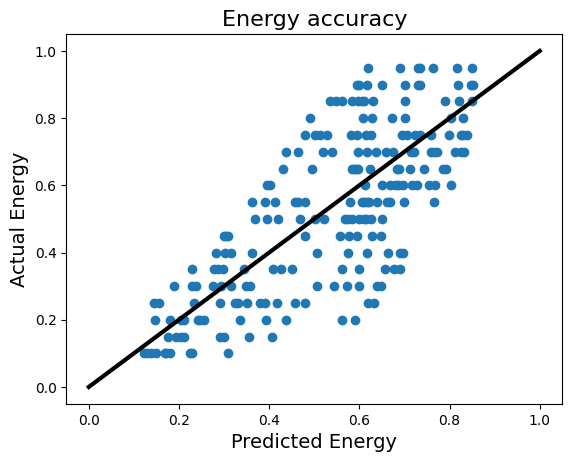

In [16]:
# Step 3: Plot the data
plt.scatter(y_pred_graph, y_test)
plt.plot([0,1],[0,1],c="black", linewidth=3)
plt.xlabel('Predicted Energy', fontsize=14)
plt.ylabel('Actual Energy', fontsize=14)
plt.title('Energy accuracy', fontsize=16)

# Increase the font size of the numbers on the axis
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("energy_scatter_plot.jpeg")
plt.show()

In [17]:
layer=(30,60)
y_pred, y_test=train(layer, y_mass)

y_pred_graph=[]
y_mass_graph=[]
# Print the predicted mass values for the test set
for i, y_pred_i in enumerate(y_pred):
    #print(f"Predicted energy {layer} layer, for test data point {i+1}: {y_pred[i]}, {y_test[i]}")
    y_pred_graph.append(y_pred_i)
    y_energy_graph.append(y_test[i])


# Calculate the percentage difference
percentage_diff = (y_pred - y_test) / y_test * 100

# Convert negative percentages to positive
percentage_diff = np.abs(percentage_diff)

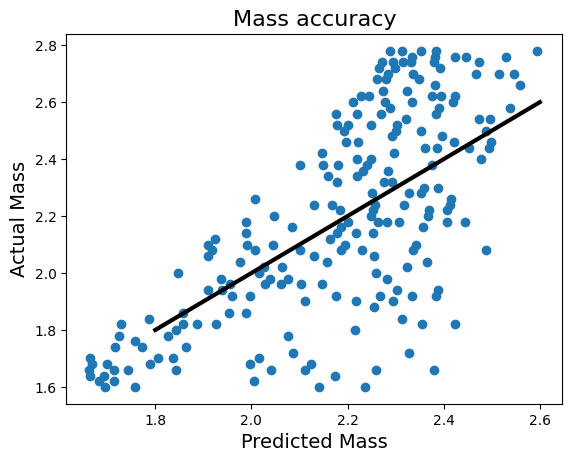

In [18]:
# Step 3: Plot the data
plt.scatter(y_pred_graph, y_test)
plt.plot([1.8,2.6],[1.8,2.6],c="black", linewidth=3)
plt.xlabel('Predicted Mass', fontsize=14)
plt.ylabel('Actual Mass', fontsize=14)
plt.title('Mass accuracy', fontsize=16)

# Increase the font size of the numbers on the axis
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("mass_scatter_plot.jpeg")
plt.show()